# Move a shape to the center of the scene

Say you have a shape inside a picture, and you want to move it somewhere else inside the same picture.


In [1]:
(ns unwavering-briars
 (:require
  [opencv4.utils :as u]
  [opencv4.colors.html :refer :all]
  [opencv4.core :refer :all]))

nil

The plan is defined as follow:

- load the picture, and add a quick border to get it to show properly here.
- go into HSV color space to be able to select only the object we want use a color range
- create a mask 

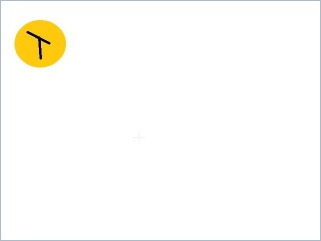

In [2]:
(def img 
  (-> "resources/morph/cjy6M.jpg" 
      (imread IMREAD_REDUCED_COLOR_2)
      (copy-make-border! 1 1 1 1 
		BORDER_CONSTANT 
        (->scalar "#aabbcc"))))

(u/>>> img)

## thresh hold on yellow in hsv spacez

In [3]:
(def mask-on-yellow
  (-> 
    img 
    clone 
    (cvt-color! COLOR_BGR2HSV) 
    (in-range! (new-scalar 20 100 100) (new-scalar 30 255 255))))

(u/>>> mask-on-yellow)

CompilerException java.lang.RuntimeException: Unable to resolve symbol: in-range! in this context, compiling:(/tmp/form-init1208619438798341878.clj:6:5) 
ClassCastException clojure.lang.Var$Unbound cannot be cast to org.opencv.core.Mat  opencv4.utils/mat-to-buffered-image (utils.clj:109)


class java.lang.ClassCastException: 

In [4]:
(-> (u/matrix-to-mat [[100 255 200]
                      [100 255 200]
                      [100 255 200]])
	(threshold! 150 255 THRESH_BINARY)
    (dump))

[0 255 255]
[0 255 255]
[0 255 255]


nil